In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv("Kidney_data.csv")
dataset.shape

(400, 26)

In [4]:
dataset.head()

,id,age,blood pressure,specific gravity,albumin,suger,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
dataset.tail()

,id,age,blood pressure,specific gravity,albumin,suger,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
dataset = dataset.drop('id', axis=1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   suger                    351 non-null    float64
 5   red blood cells          248 non-null    object 
 6   pus cell                 335 non-null    object 
 7   pus cell clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [8]:
missingvalues=dataset.isnull().sum().sort_values()*100/len(dataset)
missingvalues.to_frame

<bound method Series.to_frame of classification              0.00
peda edema                  0.25
appetite                    0.25
aanemia                     0.25
coronary artery disease     0.50
diabetes mellitus           0.50
hypertension                0.50
pus cell clumps             1.00
bacteria                    1.00
age                         2.25
blood pressure              3.00
serum creatinine            4.25
blood urea                  4.75
blood glucose random       11.00
albumin                    11.50
specific gravity           11.75
suger                      12.25
haemoglobin                13.00
pus cell                   16.25
packed cell volume         17.50
sodium                     21.75
potassium                  22.00
white blood cell count     26.25
red blood cell count       32.50
red blood cells            38.00
dtype: float64>

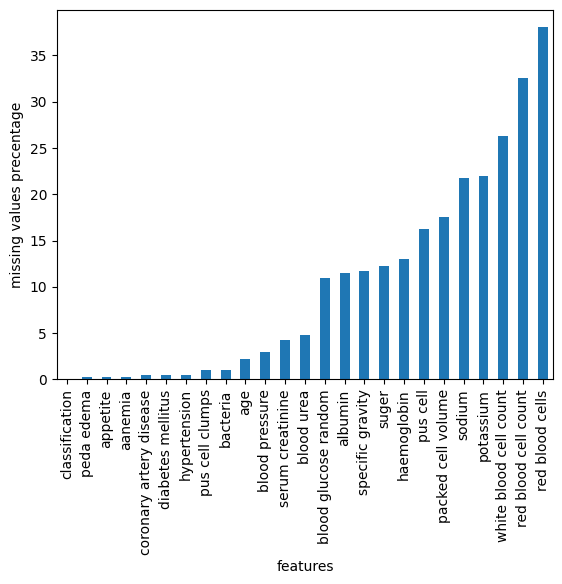

In [9]:
missingvalues.plot(kind='bar')
plt.ylabel('missing values precentage')
plt.xlabel('features')
plt.show()

In [10]:
dataset=dataset.drop(['sodium','potassium','white blood cell count','red blood cell count','red blood cells'],axis=1)

In [11]:
dataset.head()

,age,blood pressure,specific gravity,albumin,suger,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,haemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,44,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,0.8,11.3,38,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,31,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,32,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,35,no,no,no,good,no,no,ckd


In [12]:
dataset.shape

(400, 20)

In [13]:
dataset.describe()

,age,blood pressure,specific gravity,albumin,suger,blood glucose random,blood urea,serum creatinine,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,17.800000


In [14]:
dataset.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'suger',
       'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random',
       'blood urea', 'serum creatinine', 'haemoglobin', 'packed cell volume',
       'hypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'peda edema', 'aanemia', 'classification'],
      dtype='object')

In [15]:
#for pc
print(dataset['pus cell'].value_counts())
dataset['pus cell'] = dataset['pus cell'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

normal      259
abnormal     76
Name: pus cell, dtype: int64


In [16]:
#for pcc
dataset['pus cell clumps'].value_counts()
dataset['pus cell clumps'] = dataset['pus cell clumps'].replace(to_replace = {'notpresent':0,'present':1})

In [17]:
#for ba
print(dataset['bacteria'].value_counts())
dataset['bacteria'] = dataset['bacteria'].replace(to_replace = {'notpresent':0,'present':1})

notpresent    374
present        22
Name: bacteria, dtype: int64


In [18]:
#hnt
print(dataset['hypertension'].value_counts())
dataset['hypertension'] = dataset['hypertension'].replace(to_replace = {'yes' : 1, 'no' : 0})

no     251
yes    147
Name: hypertension, dtype: int64


In [19]:
#dm
print(dataset['diabetes mellitus'].value_counts())
dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})
dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(to_replace = {'yes' : 1, 'no' : 0})

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabetes mellitus, dtype: int64


In [20]:
#cad
print(dataset['coronary artery disease'].value_counts())
dataset['coronary artery disease'] = dataset['coronary artery disease'].replace(to_replace = {'\tno':'no',})
dataset['coronary artery disease'] = dataset['coronary artery disease'].replace(to_replace = {'yes' : 1, 'no' : 0})


no      362
yes      34
\tno      2
Name: coronary artery disease, dtype: int64


In [21]:
#appet
print(dataset['appetite'].unique())
dataset['appetite'] = dataset['appetite'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

['good' 'poor' nan]


In [22]:
#pe
print(dataset['peda edema'].value_counts())
dataset['peda edema'] = dataset['peda edema'].replace(to_replace = {'yes' : 1, 'no' : 0})

no     323
yes     76
Name: peda edema, dtype: int64


In [23]:
#ane
print(dataset['aanemia'].value_counts())
dataset['aanemia'] = dataset['aanemia'].replace(to_replace = {'yes' : 1, 'no' : 0})

no     339
yes     60
Name: aanemia, dtype: int64


In [24]:
#class
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd','notckd\t':'notckd'})
dataset['classification'] = dataset['classification'].replace(to_replace = {'ckd' : 1, 'notckd' : 0})
print(dataset['classification'].value_counts())

1    250
0    150
Name: classification, dtype: int64


In [25]:
dataset['packed cell volume'] = pd.to_numeric(dataset['packed cell volume'], errors='coerce')

In [26]:
feature=[['age', 'blood pressure', 'specific gravity', 'albumin', 'suger',
       'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random',
       'blood urea', 'serum creatinine', 'haemoglobin', 'packed cell volume',
       'hypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'peda edema', 'aanemia', 'classification']]
for feature in feature:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [27]:
dataset.head()

,age,blood pressure,specific gravity,albumin,suger,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,haemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,44.0,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,11.3,38.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.0,53.0,1.8,9.6,31.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,11.2,32.0,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1


<AxesSubplot: xlabel='classification', ylabel='count'>

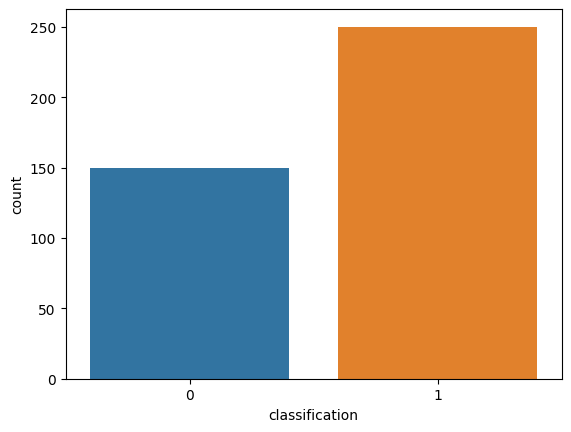

In [28]:
sns.countplot(x=dataset['classification'])

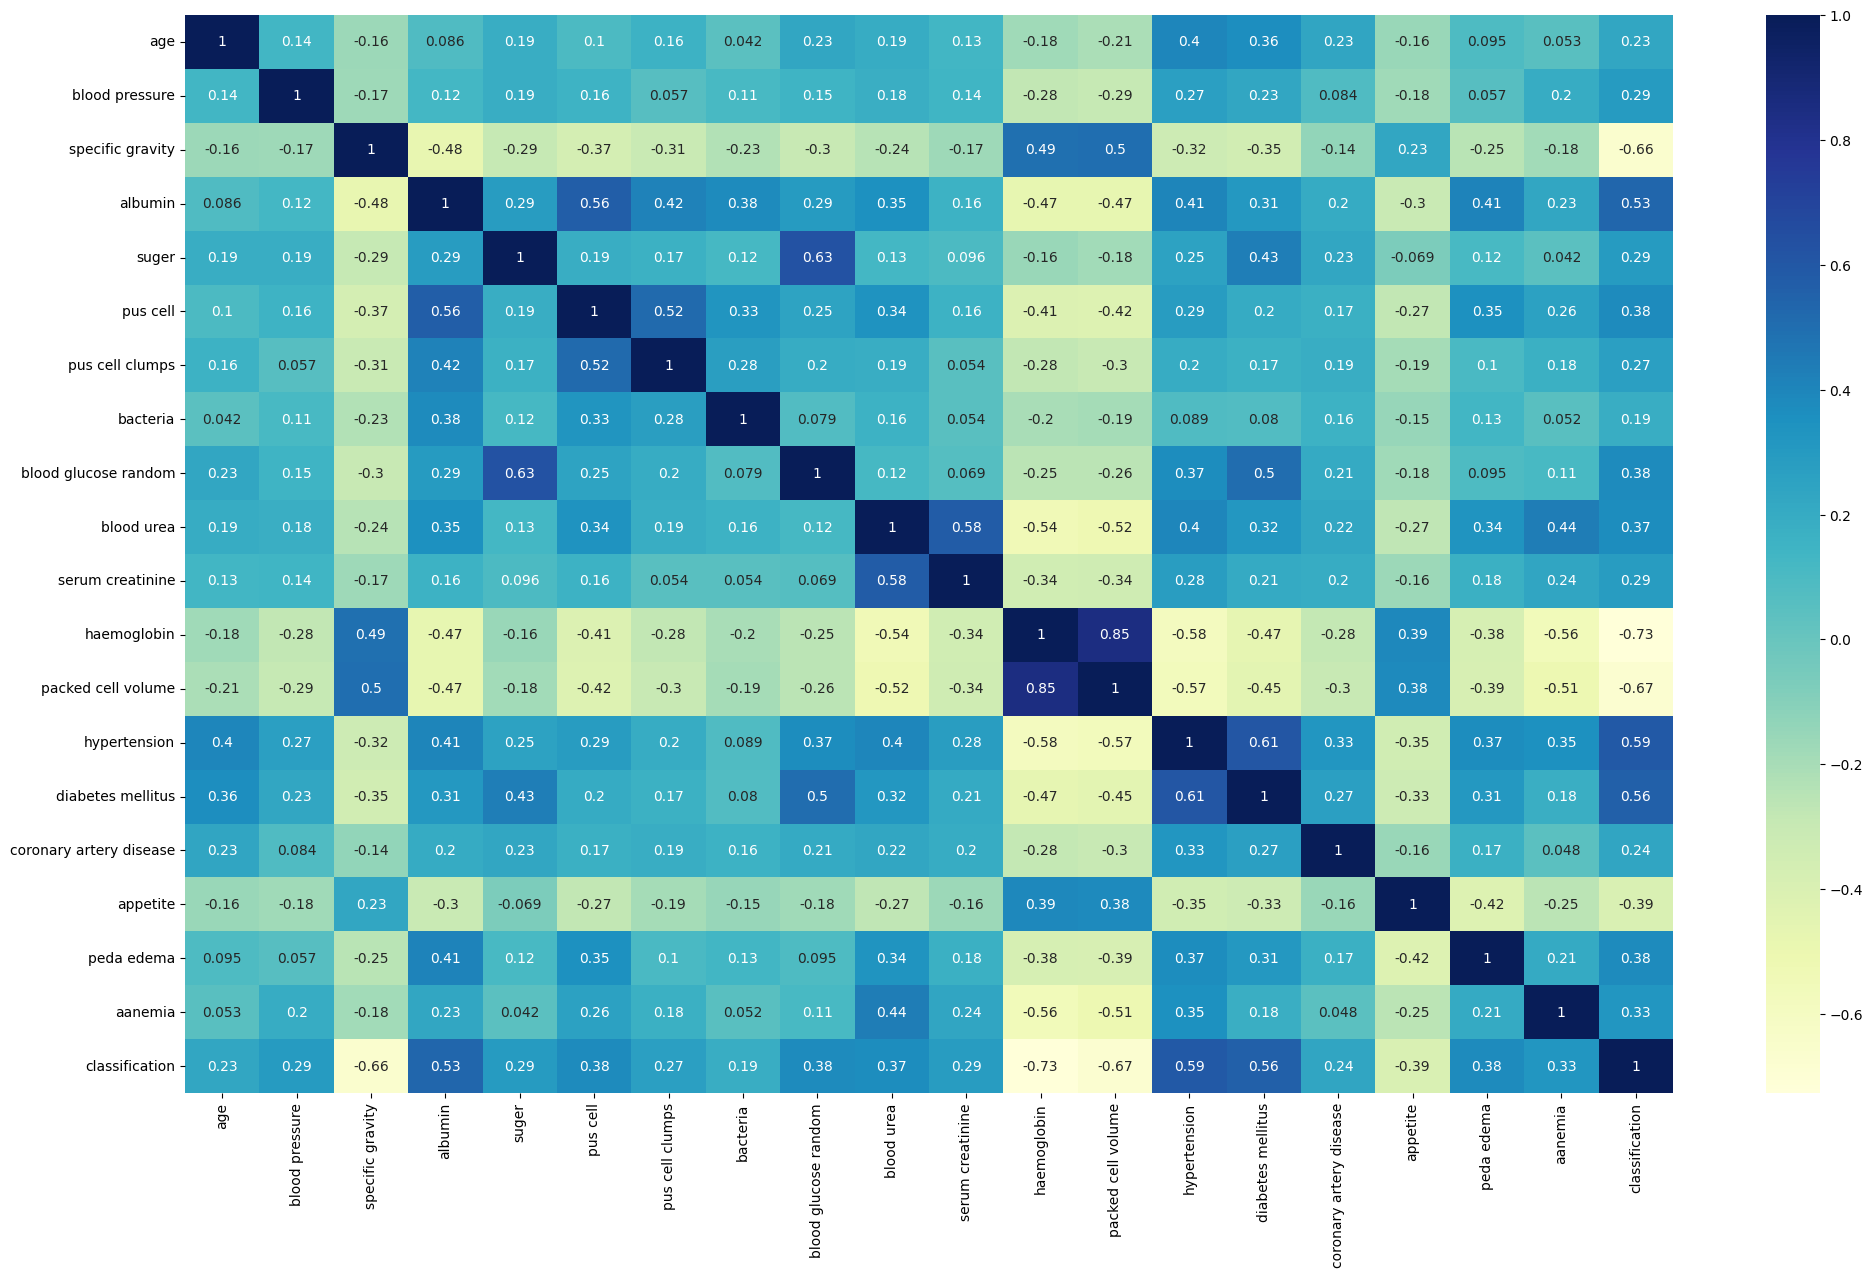

In [29]:
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

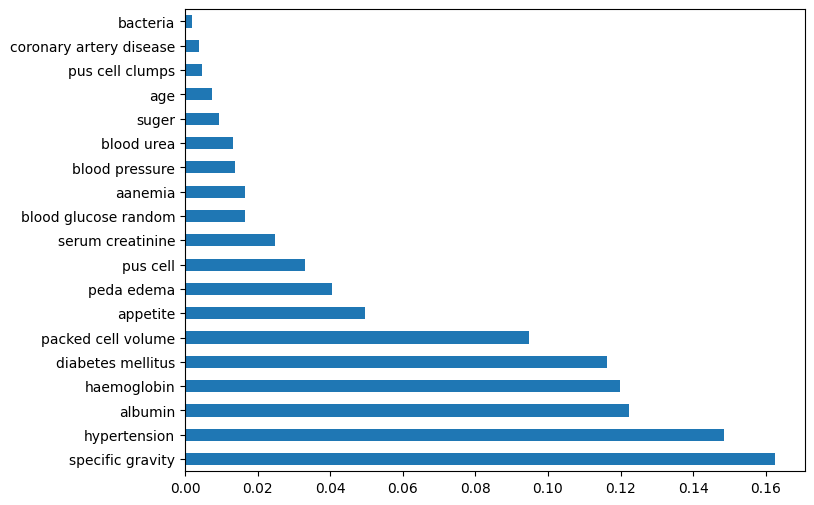

In [30]:
X = dataset.iloc[:, :-1]
y= dataset.iloc[:, -1]
        
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [31]:
ranked_features.nlargest(8).index

Index(['specific gravity', 'hypertension', 'albumin', 'haemoglobin',
       'diabetes mellitus', 'packed cell volume', 'appetite', 'peda edema'],
      dtype='object')

<AxesSubplot: xlabel='serum creatinine', ylabel='Density'>

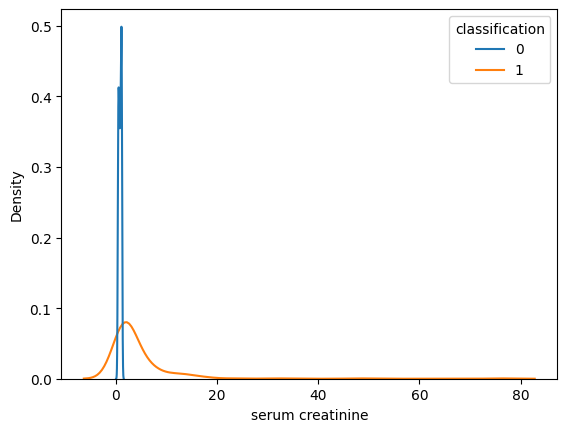

In [32]:
 sns.kdeplot(data=dataset,x='serum creatinine',hue='classification')

In [33]:
#hypertension
#dm
#albumin
#aanemia
#haemoglobin
#specific gravity
##############################
#packed cell volume
#serum creatinine
#pus cell

In [34]:
X = dataset[['specific gravity', 'hypertension', 'haemoglobin', 'diabetes mellitus','albumin','aanemia','pus cell','serum creatinine']]

In [35]:
X.head()

,specific gravity,hypertension,haemoglobin,diabetes mellitus,albumin,aanemia,pus cell,serum creatinine
0,1.020,1.0,15.4,1.0,1.0,0.0,0.0,1.2
1,1.020,0.0,11.3,0.0,4.0,0.0,0.0,0.8
2,1.010,0.0,9.6,1.0,2.0,1.0,0.0,1.8
3,1.005,1.0,11.2,0.0,4.0,1.0,1.0,3.8
4,1.010,0.0,11.6,0.0,2.0,0.0,0.0,1.4


In [36]:
X.tail()

,specific gravity,hypertension,haemoglobin,diabetes mellitus,albumin,aanemia,pus cell,serum creatinine
395,1.020,0.0,15.7,0.0,0.0,0.0,0.0,0.5
396,1.025,0.0,16.5,0.0,0.0,0.0,0.0,1.2
397,1.020,0.0,15.8,0.0,0.0,0.0,0.0,0.6
398,1.025,0.0,14.2,0.0,0.0,0.0,0.0,1.0
399,1.025,0.0,15.8,0.0,0.0,0.0,0.0,1.1


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [38]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


In [39]:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

In [40]:
predict=(RandomForest.predict(X_test))
print("traning accurcy:", RandomForest.score(X_train,y_train))
print("the accurcy of the model:", accuracy_score(y_test,predict))
print("log loss:",log_loss(y_test,RandomForest.predict_proba(X_test)))
print("crossvalidation score:",cross_val_score(RandomForest, X, y, cv=10).mean())


traning accurcy: 1.0
the accurcy of the model: 1.0
log loss: 0.013771954161205932
crossvalidation score: 0.9949999999999999


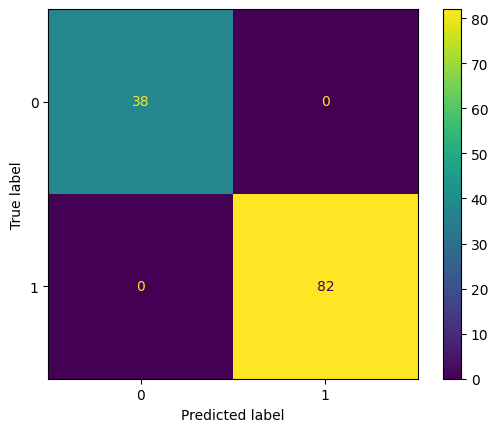

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
z=confusion_matrix(y_test,predict)
cm=ConfusionMatrixDisplay(confusion_matrix=z,display_labels=RandomForest.classes_)
cm.plot()
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X,y)
predict1=(neigh.predict(X_test))
print("traning accurcy:", neigh.score(X_train,y_train))
print("the accurcy of the model:", accuracy_score(y_test,predict1))
print("log loss:",log_loss(y_test,neigh.predict_proba(X_test)))
print("crossvalidation score:",cross_val_score(neigh, X, y, cv=10).mean())

traning accurcy: 0.9607142857142857
the accurcy of the model: 0.9833333333333333
log loss: 0.028938448381176318
crossvalidation score: 0.9574999999999999


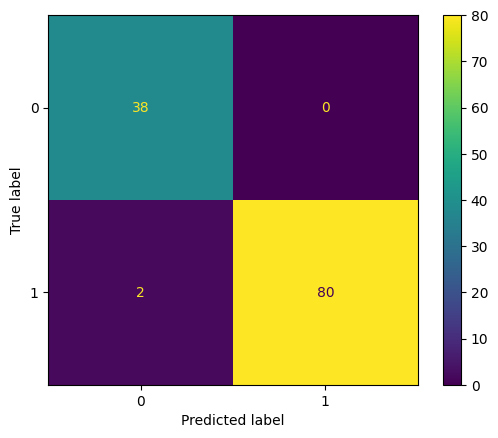

In [43]:

z=confusion_matrix(y_test,predict1)
cm=ConfusionMatrixDisplay(confusion_matrix=z,display_labels=neigh.classes_)
cm.plot()
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)
predictr2=(lr.predict(X_test))
print("traning accurcy:", lr.score(X_train,y_train))
print("the accurcy of the model:", accuracy_score(y_test,predictr2))
print("log loss:",log_loss(y_test,lr.predict_proba(X_test)))
print("crossvalidation score:",cross_val_score(lr, X, y, cv=10).mean())

traning accurcy: 0.9678571428571429
the accurcy of the model: 0.9916666666666667
log loss: 0.03803673048614496
crossvalidation score: 0.9724999999999999


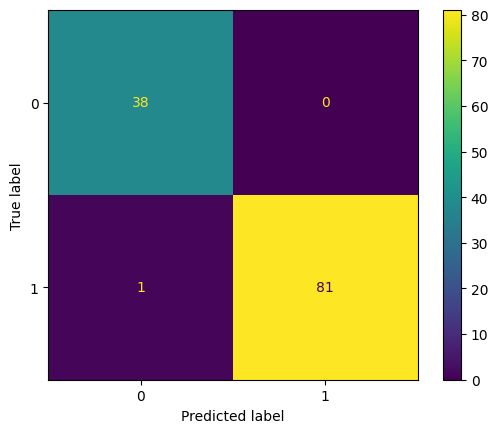

In [45]:
z=confusion_matrix(y_test,predictr2)
cm=ConfusionMatrixDisplay(confusion_matrix=z,display_labels=lr.classes_)
cm.plot()
plt.show()

In [46]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(X,y)
predictr3=(svm.predict(X_test))
print("traning accurcy:", svm.score(X_train,y_train))
print("the accurcy of the model:", accuracy_score(y_test,predictr3))
print("crossvalidation score:",cross_val_score(svm, X, y, cv=10).mean())
print("log loss:",log_loss(y_test,svm.predict_proba(X_test)))

traning accurcy: 0.9535714285714286
the accurcy of the model: 0.9833333333333333
crossvalidation score: 0.9574999999999999
log loss: 0.06761345073593152


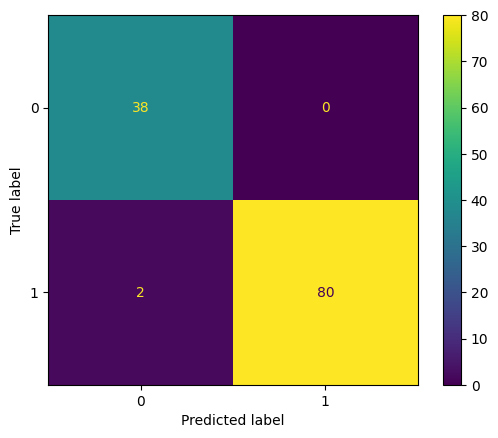

In [47]:
z=confusion_matrix(y_test,predictr3)
cm=ConfusionMatrixDisplay(confusion_matrix=z,display_labels=svm.classes_)
cm.plot()
plt.show()

In [48]:
import xgboost as xgb

In [49]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
predictr4=(svm.predict(X_test))
print("traning accurcy:", xg.score(X_train,y_train))
print("the accurcy of the model:", accuracy_score(y_test,predictr4))
print("crossvalidation score:",cross_val_score(xg, X, y, cv=10).mean())
print("log loss:",log_loss(y_test,xg.predict_proba(X_test)))

traning accurcy: 1.0
the accurcy of the model: 0.9833333333333333
crossvalidation score: 0.9949999999999999
log loss: 0.054440336967097255


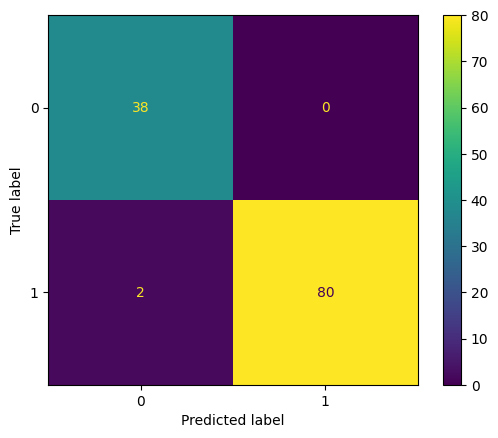

In [50]:
z=confusion_matrix(y_test,predictr4)
cm=ConfusionMatrixDisplay(confusion_matrix=z,display_labels=xg.classes_)
cm.plot()
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictr5=(dt.predict(X_test))
print("traning accurcy:", dt.score(X_train,y_train))
print("the accurcy of the model:", accuracy_score(y_test,predictr5))
print("crossvalidation score:",cross_val_score(dt, X, y, cv=10))
print("log loss:",log_loss(y_test,dt.predict_proba(X_test)))

traning accurcy: 1.0
the accurcy of the model: 0.9833333333333333
crossvalidation score: [1.    1.    1.    1.    1.    1.    0.975 0.95  1.    0.975]
log loss: 0.600727556485286


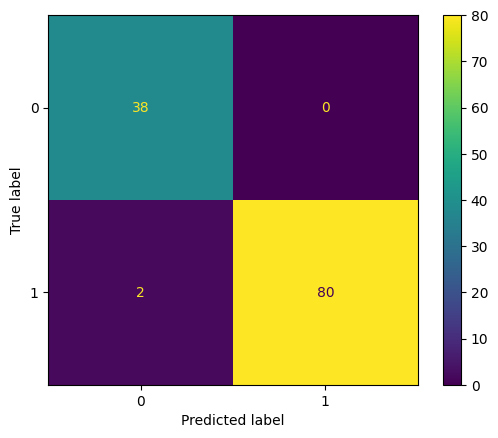

In [52]:
z=confusion_matrix(y_test,predictr5)
cm=ConfusionMatrixDisplay(confusion_matrix=z,display_labels=dt.classes_)
cm.plot()
plt.show()

In [53]:
#specific gravity,hypertension,haemoglobin,diabetes mellitus,albumin,aanemia,pus cell
input=(1.020,0.0,15.7,0.0,0.0,0.0,0.0,0.5)
inputnp=np.array(input)
inputreshape=inputnp.reshape(1,-1)

In [54]:
outter=RandomForest.predict(inputreshape)
if (outter[0]==0):
    print('not ckd')
else:
    print('has ckd')

not ckd


C:\Users\sai bharath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
